Bài ôn tập giữa kỳ

# NỘI DUNG ÔN TẬP

__1. PHÂN PHỐI XÁC XUẤT__

- Sử dụng các phân phối xác suất từ thư viện scipy
- Tính được hàm mật độ/ hàm độ lớn, và hàm phân phối tích luỹ của phân phối.
- Vẽ đồ thị các hàm phân phối xác suất

__2. THỐNG KÊ MÔ TẢ__

- Tiền xử lý dữ liệu
- Tính các đặc trưng của dữ liệu
- Trực quan dữ liệu

# PHÂN PHỐI XÁC SUẤT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import t

## 1. PP Binomial

Cho một biến ngẫu nhiên X có phân phối nhị thức: X ~ B(n , p). Với n=20, p=0.1

a. Tính các giá trị: E(X), Var(X)

b. Tính P(X = 3)

c. Tính P(X <= 5)

d. Tính P(X > 10)

e. Vẽ đồ thị hàm mật độ và hàm phân phối tích luỹ của biến ngẫu nhiên X.

f. Thực hiện lại câu e với gía trị của n = 100

In [56]:
n, p = 20, 0.1

In [58]:
x = binom(n, p)

#### Tính các giá trị: E(X), Var(X)

In [59]:
print('Kỳ vọng: {}\nPhương sai: {}'.format(x.mean(), x.var()))

Kỳ vọng: 2.0
Phương sai: 1.8


In [6]:
print('P(X = 3) = {}'.format(binom.pmf(3, n, p).round(4)))

P(X = 3) = 0.1901


In [7]:
print('P(X <= 5) = {}'.format(binom.cdf(5, n, p).round(4)))

P(X <= 5) = 0.9887


In [11]:
print('P(X > 10) =',((1 - binom.cdf(10, n, p))))

P(X > 10) = 7.088606331917546e-07


##### Vẽ đồ thị hàm mật độ và hàm phân phối tích luỹ của biến ngẫu nhiên X.

In [12]:
x = range(21)
y = binom.pmf(x, n, p)
print('x:',x)
print('y:',y)

x: range(0, 21)
y: [1.21576655e-01 2.70170344e-01 2.85179807e-01 1.90119871e-01
 8.97788281e-02 3.19213611e-02 8.86704476e-03 1.97045439e-03
 3.55776487e-04 5.27076277e-05 6.44204339e-06 6.50711453e-07
 5.42259544e-08 3.70775757e-09 2.05986532e-10 9.15495696e-12
 3.17880450e-13 8.31060000e-15 1.53900000e-16 1.80000000e-18
 1.00000000e-20]


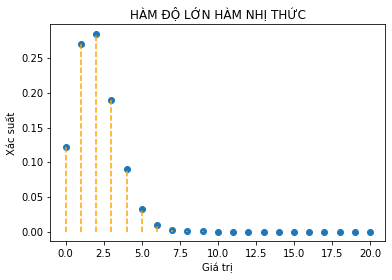

In [17]:
plt.scatter(x, y)
for value in x:
    plt.plot([value, value], [0, y[value]], color='orange', ls='--')
plt.title('HÀM ĐỘ LỚN HÀM NHỊ THỨC')
plt.xlabel('Giá trị')
plt.ylabel('Xác suất')
plt.show()

In [19]:
x2 = range(21)
xs_tichluy = binom.cdf(x, n, p)
print('Xác suất tích lũy:',xs_tichluy)
print('x:',x2)

Xác suất tích lũy: [0.12157665 0.391747   0.67692681 0.86704668 0.9568255  0.98874687
 0.99761391 0.99958436 0.99994014 0.99999285 0.99999929 0.99999994
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
x: range(0, 21)


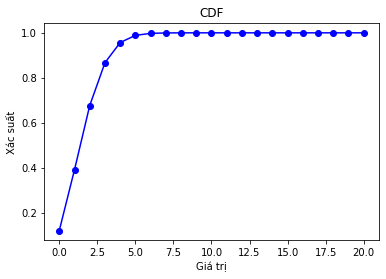

In [40]:
plt.plot(x2,  xs_tichluy, 'o-b')
plt.title('CDF')
plt.xlabel('Giá trị')
plt.ylabel('Xác suất')
plt.show()

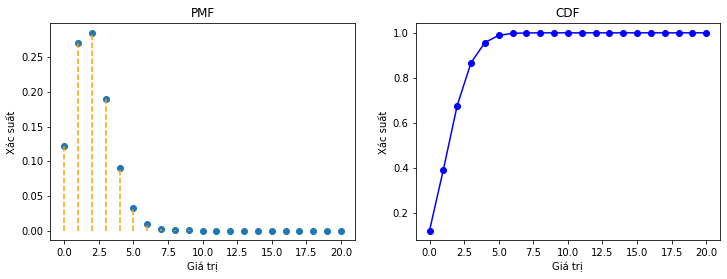

In [44]:
# Vẽ cả hai biểu đồ cùng lúc
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(x, y)
for value in x:
    axes[0].plot([value, value], [0, y[value]], color='orange', ls='--')
axes[0].set(xlabel='Giá trị', ylabel='Xác suất', title='PMF')

axes[1].plot(x2,  xs_tichluy, 'o-b')
axes[1].set(xlabel='Giá trị', ylabel='Xác suất', title='CDF')
plt.show()


## 2. PP Poisson

Cho một biến ngẫu nhiên X có phân phối Poisson: X ~ P(4).

a. Tính các giá trị: E(X), Var(X)

b. Tính P(X = 3)

c. Tính P(X <= 5)

d. Tính P(X > 10)

e. Vẽ đồ thị hàm mật độ và hàm phân phối tích luỹ của biến ngẫu nhiên X.

In [73]:
x = poisson(4)

In [74]:
x_mean = x.mean()
print('Kỳ vọng: {}\nPhương sai: {}'.format(x_mean, x.var()))

Kỳ vọng: 4.0
Phương sai: 4.0


In [76]:
print('P(X = 3) =',poisson.pmf(3, x_mean))

P(X = 3) = 0.19536681481316454


In [75]:
print('P(X <= 5) =',poisson.cdf(5, x_mean))

P(X <= 5) = 0.7851303870304052


In [72]:
# poisson.cdf(n, mu)
print('P(X > 10) =',(1 - poisson.cdf(10, x_mean)))      

P(X > 10) = 0.0028397661205137315


## 3. PP Chuẩn

Cho một biến ngẫu nhiên X có phân phối chuẩn: X ~ N($\mu , \sigma$). Với $\mu = 450, \sigma=10$

a. Tính các giá trị: E(X), Var(X)

b. Tính P(X < 300)

c. Tính P(300 < X < 450)

d. Tính P(X > 800)

e. Tìm M để P(X < M) = 0.2

f. Tìm N để tỷ lệ các biến ngẫu nhiên X > N là 10%

g. Tìm C để P(X-C < X < X+C) = 0.95

h. Vẽ đồ thị hàm mật độ và hàm phân phối tích luỹ của biến ngẫu nhiên X.

In [110]:
x = norm(450, 10)

In [111]:
print('Kỳ vọng: {}\nPhương sai: {}'.format(x_mean, x.var()))

Kỳ vọng: 4.0
Phương sai: 100.0


In [115]:
print('P(X < 300) =',(norm.cdf(300, loc=450, scale=10)))

P(X < 300) = 3.6709661993126986e-51


In [105]:
print('P(300 < X < 450) =',(norm.cdf(450, loc=450, scale=10) - norm.cdf(300, loc=450, scale=10)))

P(300 < X < 450) = 0.5


In [100]:
print('P(X > 800) =',(1 - norm.cdf(800, loc=450, scale=10)))

P(X > 800) = 0.0


In [113]:
print('P(X > 800) =',(0.5 + norm.cdf(800, loc=450, scale=10)))

P(X > 800) = 1.5


##### Tìm M để P(X < M) = 0.2

In [120]:
for i in range(450):
    if norm.cdf(i, loc=450, scale=10).round(1) == 0.2:
        print('P(X < {}) = {}'.format(i,norm.cdf(i, loc=450, scale=10)))
        break

P(X < 440) = 0.15865525393145707


# THỐNG KÊ MÔ TẢ

Thực hiện thống kê mô tả trên tập dữ liệu `mpg.csv`